In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import Pipeline
from numpy.linalg import svd
import numpy
import matplotlib.pyplot as plt

In [114]:
query = ['computer']

body = [
    'math math calculus algebra',
    'math club advisor',
    'computer club club',
    'ball ball ball math algebra',
]

In [115]:
vectorizer = CountVectorizer()

vectorizer.fit(body)

bag_of_words = vectorizer.transform(body)

query_vector = vectorizer.transform(query)


pd.DataFrame(bag_of_words.todense(), index=['doc1', 'doc2', 'doc3', 'doc4'], columns =vectorizer.get_feature_names()) 

,advisor,algebra,ball,calculus,club,computer,math
doc1,0,1,0,1,0,0,2
doc2,1,0,0,0,1,0,1
doc3,0,0,0,0,2,1,0
doc4,0,1,3,0,0,0,1


In [116]:
svd = TruncatedSVD(n_components=2)

lsa = svd.fit(bag_of_words)
lsa = svd.transform(bag_of_words)
query_vector = svd.transform(query_vector)

topic_encoded_df = pd.DataFrame(lsa, columns = ['topic_1', 'topic_2'])
topic_encoded_df['body'] = body

topic_encoded_df[['body','topic_1', 'topic_2']]

,body,topic_1,topic_2
0,math math calculus algebra,1.588876,0.750221
1,math club advisor,0.682114,1.314351
2,computer club club,0.176095,1.873804
3,ball ball ball math algebra,3.118702,-0.775487


In [117]:
pd.DataFrame(svd.singular_values_, index=['topic_1', 'topic_2'])

,0
topic_1,3.570311
topic_2,2.530389


In [118]:
dictionary = vectorizer.get_feature_names()

encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2'],
                               columns=dictionary).T

encoding_matrix

,topic_1,topic_2
advisor,0.053511,0.205275
algebra,0.369305,-0.003946
ball,0.733978,-0.363347
calculus,0.124646,0.117170
club,0.081140,0.790577
computer,0.013814,0.292651
math,0.547462,0.318499


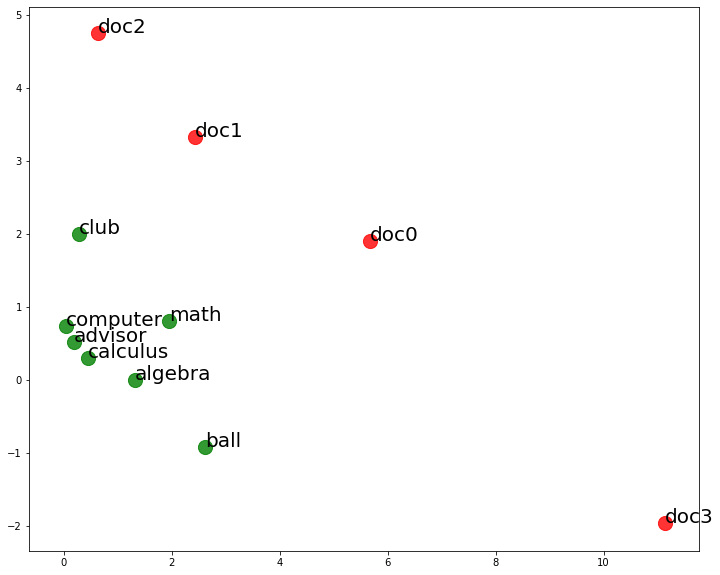

In [119]:
document_points = lsa * svd.singular_values_
term_points =  svd.components_.T * svd.singular_values_

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

for index in range(len(document_points)):
    x,y = document_points[index]
    ax.scatter(x, y, alpha=0.8, s=200, c='red')
    text = 'doc' + str(index)
    text = ax.annotate(text, (x, y))
    text.set_fontsize(20)
    
for index in range(len(term_points)):
    x,y = term_points[index]
    ax.scatter(x, y, alpha=0.8,s=200, c='green')
    text = ax.annotate(dictionary[index], (x, y))
    text.set_fontsize(20)
    
    
plt.show()

In [120]:
distance_matrix = pairwise_distances(query_vector, 
                                    lsa, 
                                    metric='cosine')
cosines = []
for distance in distance_matrix[0]:
    cosines.append(1 - distance)
    
cosinesDF = pd.DataFrame(cosines, index=['doc1', 'doc2', 'doc3', 'doc4'], columns=['Relevance'])
cosinesDF['Document'] = body
cosinesDF

,Relevance,Document
doc1,0.469132,math math calculus algebra
doc2,0.908322,math club advisor
doc3,0.998918,computer club club
doc4,-0.195282,ball ball ball math algebra


In [121]:
cosinesDF.sort_values("Relevance", axis = 0, ascending = False) 

,Relevance,Document
doc3,0.998918,computer club club
doc2,0.908322,math club advisor
doc1,0.469132,math math calculus algebra
doc4,-0.195282,ball ball ball math algebra
